In [1]:
import numpy as np
import librosa 
import matplotlib.pyplot as plt

In [5]:
FIG_SIZE = (15,10)

In [3]:
signal, sr = librosa.load('./data/original_dataset/DPR/011106nt1_intvoc.wav', sr=10000)

Text(129.84722222222223, 0.5, 'Amplitude')

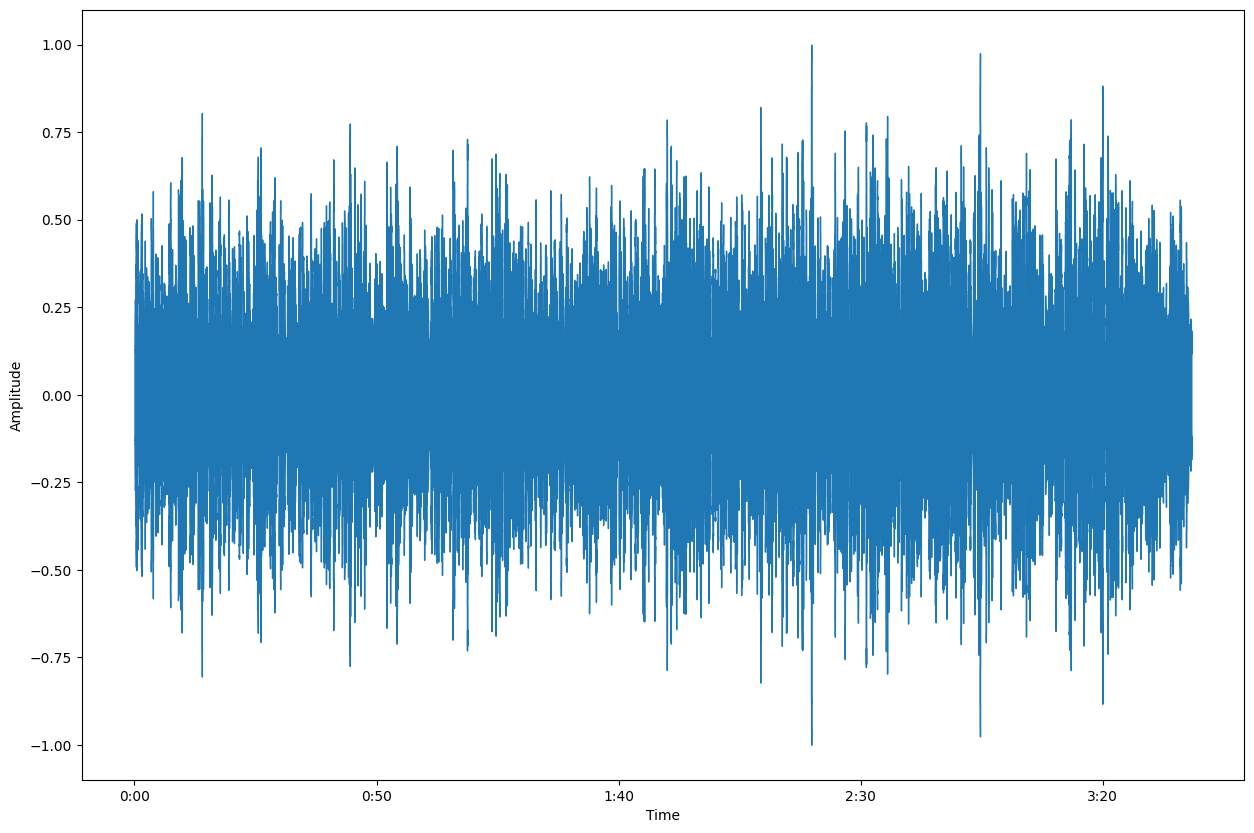

In [6]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")

In [8]:
# print audio duration
time = librosa.get_duration(y=signal, sr=sr)
print(f"Time: ", time/60, "minutes")
print("Sample Rate: ", sr)

Time:  3.6383333333333336 minutes
Sample Rate:  10000


Text(0.5, 1.0, 'Power spectrum')

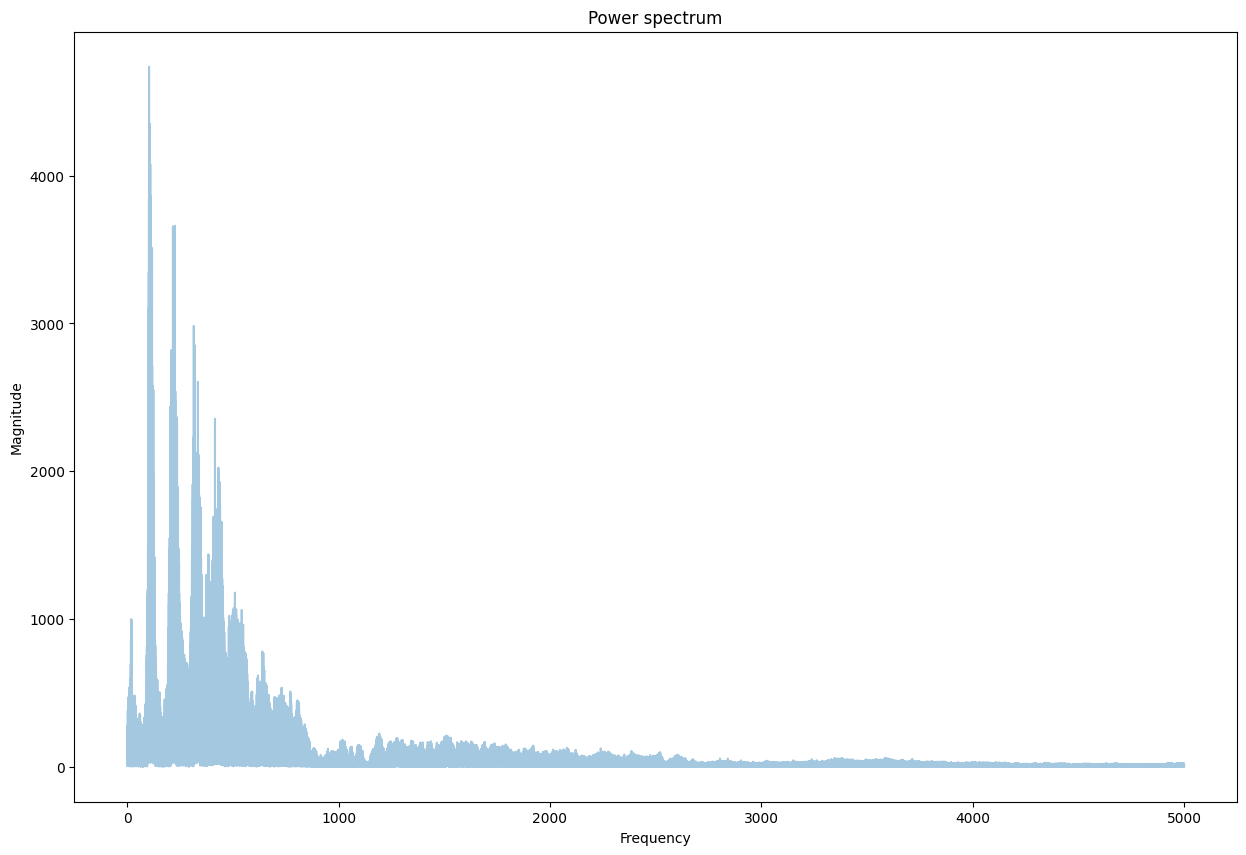

In [9]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sr, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

STFT hop length duration is: 0.0512s
STFT window duration is: 0.2048s


Text(0.5, 1.0, 'Spectrogram')

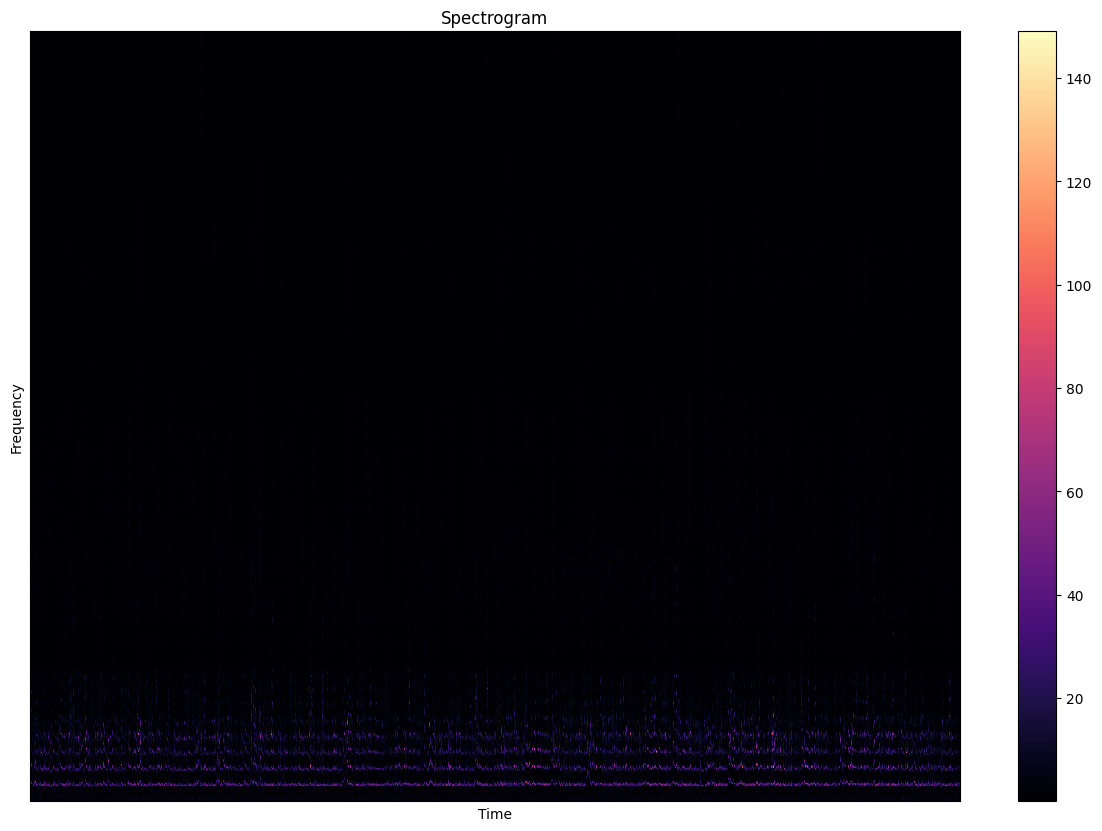

In [10]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

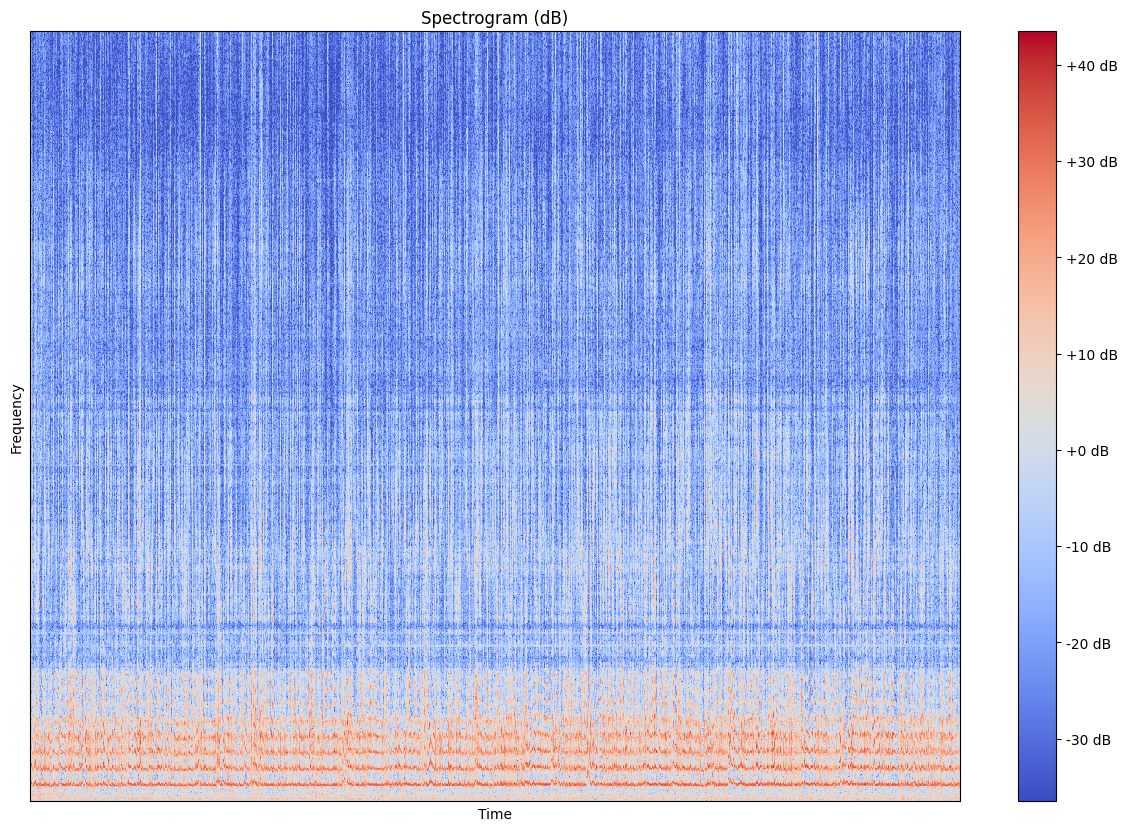

In [11]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'Mel Spectrogram')

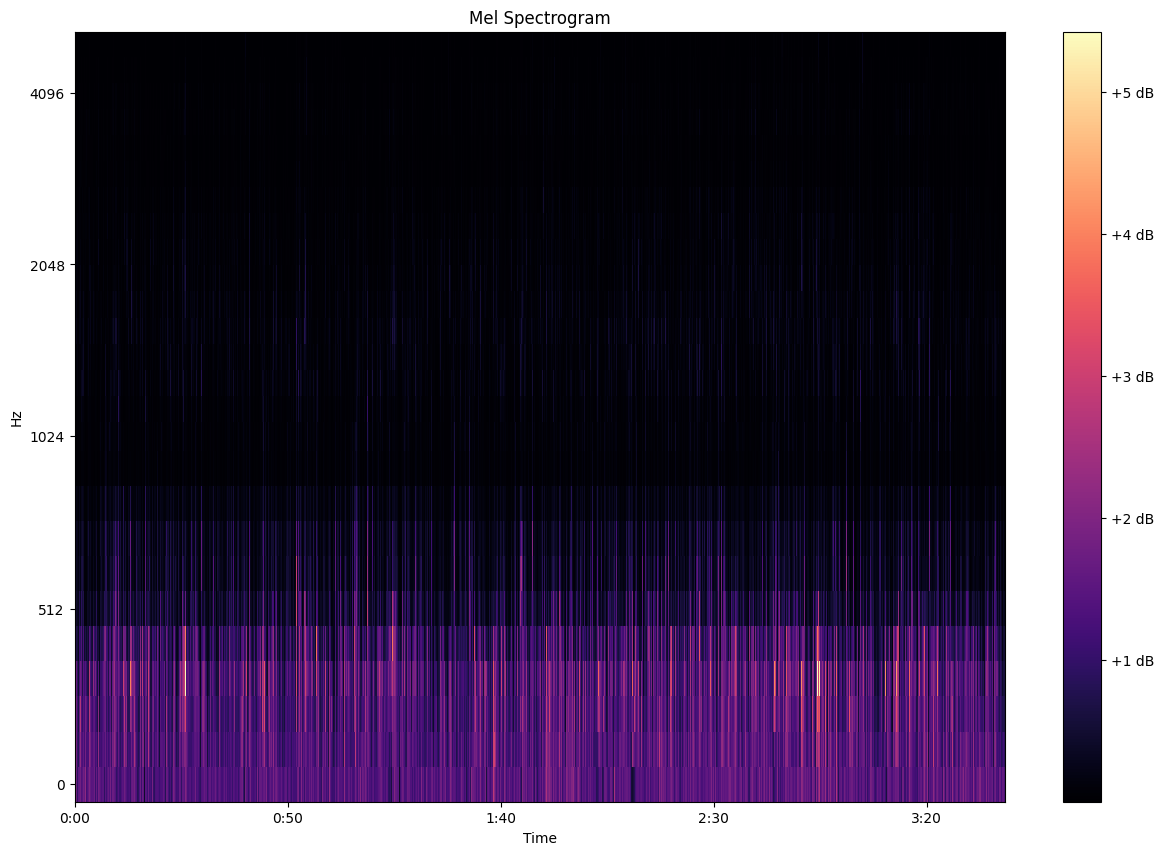

In [12]:
# Create a Mel filter bank
mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=26)

# Apply the filter bank to the spectrogram
mel_spectrogram = np.dot(mel_filter_bank, spectrogram)

# Display Mel spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(data=mel_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")

Text(0.5, 1.0, 'Mel Spectrogram (dB)')

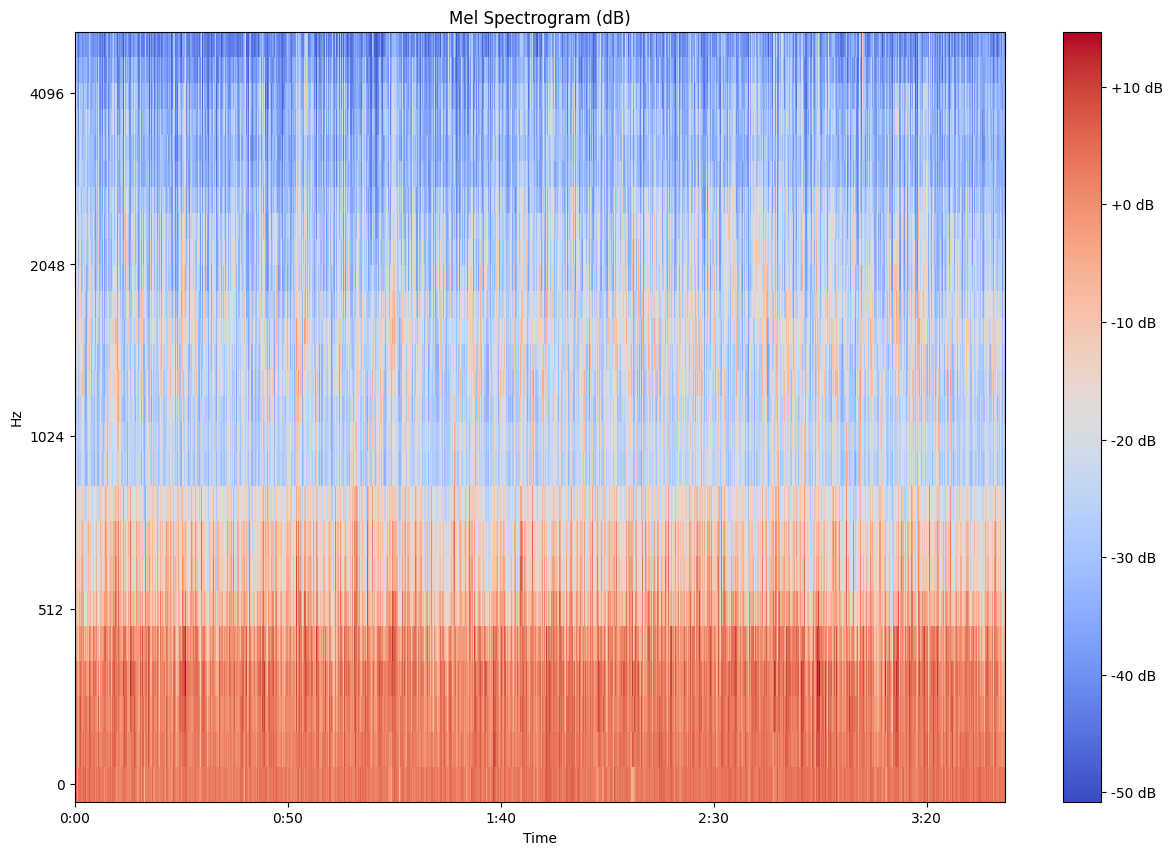

In [13]:
# Apply logarithm to cast amplitude to Decibels
log_mel_spectrogram = librosa.amplitude_to_db(mel_spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(data=log_mel_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram (dB)")

Text(0.5, 1.0, 'MFCCs')

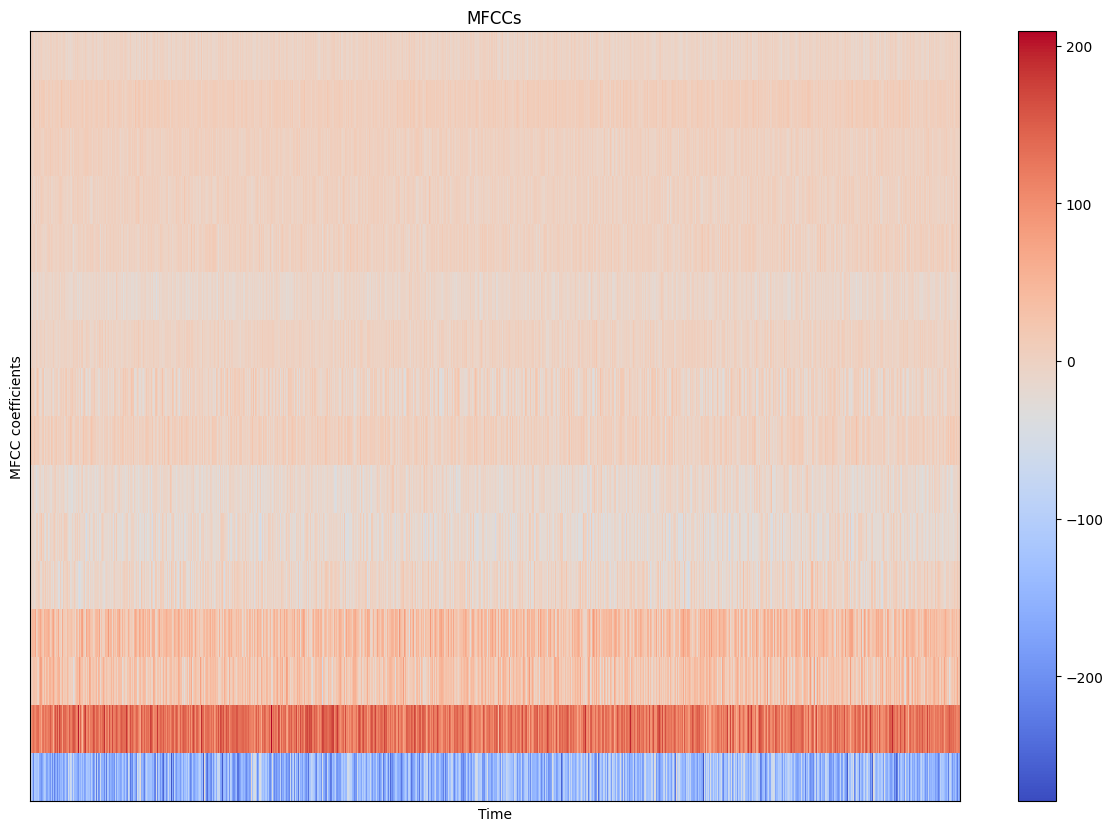

In [14]:
# MFCCs
# extract 16 MFCCs
MFCCs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=16, n_fft=n_fft, hop_length=hop_length)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")